<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Encode_N_ary_Tree_to_Binary_Tree_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Encode N-ary Tree to Binary Tree

Design an algorithm to encode an N-ary tree into a binary tree and decode the binary tree to get the original N-ary tree. An N-ary tree is a rooted tree in which each node has no more than N children. Similarly, a binary tree is a rooted tree in which each node has no more than 2 children. There is no restriction on how your encode/decode algorithm should work. You just need to ensure that an N-ary tree can be encoded to a binary tree and this binary tree can be decoded to the original N-nary tree structure.

Nary-Tree input serialization is represented in their level order traversal, each group of children is separated by the null value (See following example).

For example, you may encode the following 3-ary tree to a binary tree in this way:

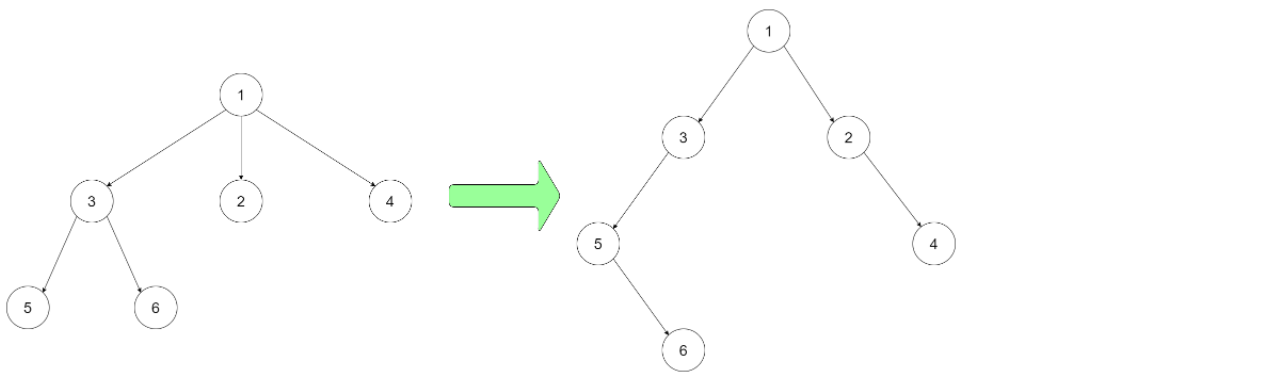



```
Input: root = [1,null,3,2,4,null,5,6]
```



Note that the above is just an example which might or might not work. You do not necessarily need to follow this format, so please be creative and come up with different approaches yourself.

Example 1:

```
Input: root = [1,null,3,2,4,null,5,6]
Output: [1,null,3,2,4,null,5,6]
```



Example 2:

```
Input: root = [1,null,2,3,4,5,null,null,6,7,null,8,null,9,10,null,null,11,null,12,null,13,null,null,14]
Output: [1,null,2,3,4,5,null,null,6,7,null,8,null,9,10,null,null,11,null,12,null,13,null,null,14]
```



Example 3:

```
Input: root = []
Output: []
```



Constraints:

```
The number of nodes in the tree is in the range [0, 104].
0 <= Node.val <= 104
The height of the n-ary tree is less than or equal to 1000
Do not use class member/global/static variables to store states. Your encode and decode algorithms should be stateless.
```



# Solution: BFS

In [1]:
from collections import deque

# Definition for a Node.
class Node(object):
    def __init__(self, val=None, children=[]):
        self.val = val
        self.children = children

# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Codec:
    def encode(self, root):
        """Encodes an n-ary tree to a binary tree.
        :type root: Node
        :rtype: TreeNode
        """
        if not root:
            return None

        rootNode = TreeNode(root.val)
        queue = deque([(rootNode, root)])

        while queue:
            parent, curr = queue.popleft()
            prevBNode = None
            headBNode = None
            # traverse each child one by one
            for child in curr.children:
                newBNode = TreeNode(child.val)
                if prevBNode:
                    prevBNode.right = newBNode
                else:
                    headBNode = newBNode
                prevBNode = newBNode
                queue.append((newBNode, child))

            # use the first child in the left node of parent
            parent.left = headBNode

        return rootNode


    def decode(self, data):
        """Decodes your binary tree to an n-ary tree.
        :type data: TreeNode
        :rtype: Node
        """
        if not data:
            return None

        # should set the default value to [] rather than None,
        # otherwise it wont pass the test cases.
        rootNode = Node(data.val, [])

        queue = deque([(rootNode, data)])

        while queue:
            parent, curr = queue.popleft()

            firstChild = curr.left
            sibling = firstChild

            while sibling:
                # Note: the initial value of the children list should not be None, which is assumed by the online judge.
                newNode = Node(sibling.val, [])
                parent.children.append(newNode)
                queue.append((newNode, sibling))
                sibling = sibling.right

        return rootNode

In [2]:
root = Node(1)
root.children = [Node(3), Node(2), Node(1)]
root.children[0].children = [Node(5), Node(6)]

binary_root = Codec().encode(root)
print(binary_root.val)
print(binary_root.left.val)
print(binary_root.left.right.val)

1
3
2


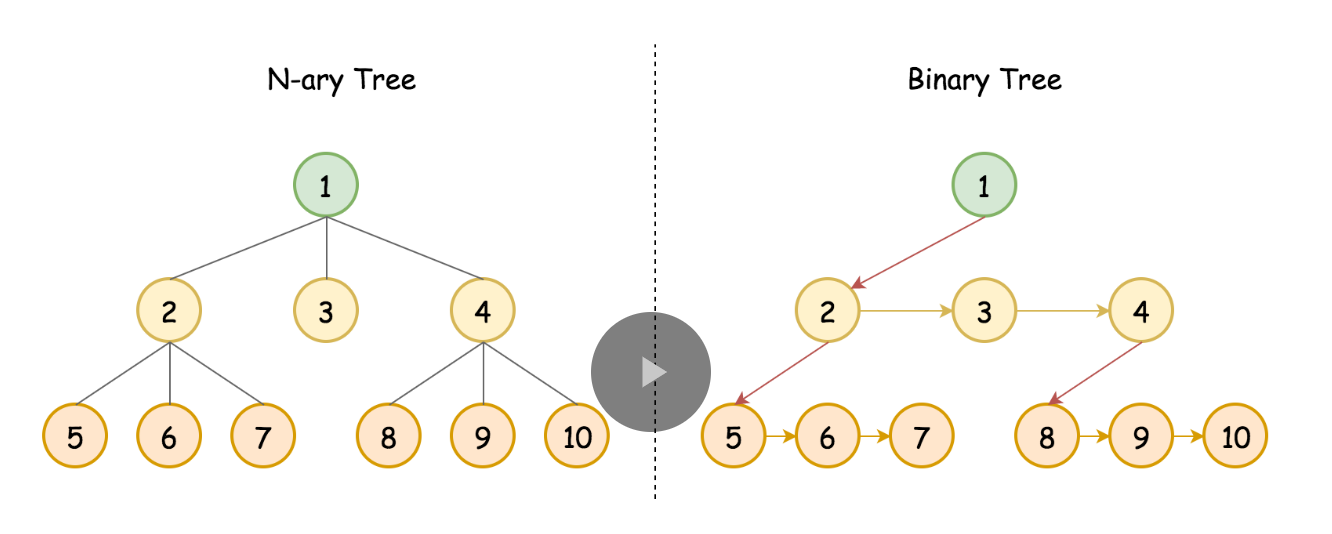